In [1]:
import numpy as np
from astropy import wcs
from astropy.io import fits

In [2]:
from pygsm import GlobalSkyModel

In [3]:
%matplotlib inline

In [4]:
gsm_2008 = GlobalSkyModel(freq_unit='MHz',interpolation='pchip', basemap='haslam')

In [5]:
gsm_2008.generate(408)

array([3.50524145, 3.40735467, 3.26719177, ..., 2.86120693, 2.93683404,
       2.87882639])

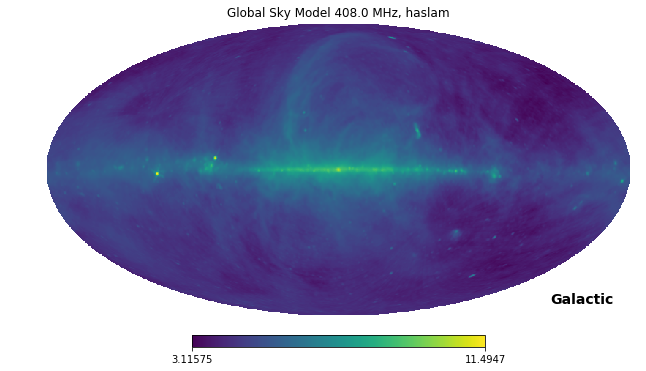

In [6]:
gsm_2008.view(logged=True)

In [4]:
w = wcs.WCS(naxis=2)

In [5]:
#w.wcs.crpix = [312.59085, +53.31028]
#w.wcs.cdelt = np.array([-0.08, 0.08])
#w.wcs.crval = [90, -90]
#w.wcs.ctype = ["RA---ARC", "DEC--ARC"]
#w.wcs.set_pv([(2, 1, 45.0)])


#header = {'NAXIS' : 2, 'NAXIS1': 100, 'NAXIS2': 80,
#          'CTYPE1' : 'RA---ARC',
#          'CRVAL1' :0.0, 'CRPIX1' : 50, 'CUNIT1' : 'deg', 'CDELT1' : -5.0,
#          'CTYPE2' : 'DEC--ARC',
#          'CRVAL2' : dec0, 'CRPIX2' : 40, 'CUNIT2' : 'deg', 'CDELT2' : 5.0
#         }


# https://www.astro.rug.nl/software/kapteyn/allsky.html#fig-8-zenithal-equidistant-projection-arc

In [18]:
header = w.to_header()
header.remove('WCSAXES')
header.remove('CRPIX1')
header.remove('CRPIX2')
header.remove('CDELT1')
header.remove('CDELT2')
header.remove('CRVAL1')
header.remove('CRVAL2')
header.remove('LATPOLE')
#header.remove('LONPOLE')
#header.remove('CUNIT1')
#header.remove('CUNIT2')
#header.remove('RADESYS')
#header.remove('CTYPE1')
#header.remove('CTYPE2')

header.insert(0, ('BITPIX', -32))
header.insert(1, ('NAXIS', 2))
header.insert(2, ('NAXIS1', 3300))
header.insert(3, ('NAXIS2', 3300))
header.insert(4, ('CTYPE1', 'RA---ZEA'))
header.insert(5, ('CTYPE2', 'DEC--ZEA'))
#header.insert(4, ('CTYPE1', 'RA---SIN'))
#header.insert(5, ('CTYPE2', 'DEC--SIN'))
#header.insert(4, ('CTYPE1', 'RA---ARC'))
#header.insert(5, ('CTYPE2', 'DEC--ARC'))
header.insert(6, ('CRVAL1', 0.0))
#header.insert(6, ('CRVAL1', 0.0))
header.insert(7, ('CRPIX1', 1650))
header.insert(8, ('CUNIT1', 'deg'))
header.insert(9, ('CDELT1', 0.05))
header.insert(10, ('CRVAL2', 89.9999999999))
#header.insert(10, ('CRVAL2', 89.9999997))
header.insert(11, ('CRPIX2', 1650))
header.insert(12, ('CUNIT2', 'deg'))
header.insert(13, ('CDELT2', 0.05))

header.tostring()

"BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                 3300                                                  NAXIS2  =                 3300                                                  CTYPE1  = 'RA---ZEA'                                                            CTYPE2  = 'DEC--ZEA'                                                            CRVAL1  =                  0.0                                                  CRPIX1  =                 1650                                                  CUNIT1  = 'deg     '                                                            CDELT1  =                 0.05                                                  CRVAL2  =        89.9999999999                                                  CRPIX2  =                 3300                                                  CUNIT2  = 'deg     '                   

In [19]:
header.tofile('A12_zea.header', sep='\n', endcard=True, padding=False, overwrite=True)

In [52]:
header1 = fits.open('GSM_68MHz_FITS.fits')[0].header

In [14]:
header1.tostring()

'SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 2560 / length of data axis 1                          NAXIS2  =                 2560 / length of data axis 2                          EXTEND  =                    F / No FITS extensions are present                 COMMENT   FITS (Flexible Image Transport System) format is defined in \'AstronomyCOMMENT   and Astrophysics\', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = \'2018-07-15T21:44:45\' / file creation date (YYYY-MM-DDThh:mm:ss UT)   CRPIX1  =               1280.5 / Coordinate reference pixel                     CRPIX2  =               1280.5 / Coordinate reference pixel                     PC1_1   =           0.70710677 / Transformation matrix element                  PC1_2   =           0.70710677 / Tr

Extracting the Galactic model from the images takes far too long, either as shapelets or gaussian components using PyBDSF or shapelet_gui.

Proceeding with calibrating using the A-team, DI calibration using the complete data set, DDE cal with a cut of <10$\lambda$ for subtraction of the A-team.